In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("s4e12_data/train.csv")
test_data = pd.read_csv("s4e12_data/test.csv")

test_labels = pd.read_csv("s4e12_data/sample_submission.csv")

print(train_data.shape)
print(test_data.shape)

print(train_data.info())

(1200000, 21)
(800000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insuran

In [3]:
train_data.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [4]:
gb = train_data.groupby(["Occupation"])[["Annual Income"]].describe()
gb

Annual Income                                                    \
                      count          mean           std  min     25%      50%   
Occupation                                                                      
Employed           272273.0  32747.057259  32218.615172  5.0  7977.0  23961.0   
Self-Employed      271870.0  32909.187329  32354.538042  2.0  7991.0  23961.0   
Unemployed         266083.0  32864.541820  32337.407979  2.0  7983.0  23962.0   

                                  
                   75%       max  
Occupation                        
Employed       44637.0  149996.0  
Self-Employed  44762.0  149997.0  
Unemployed     44740.0  149997.0

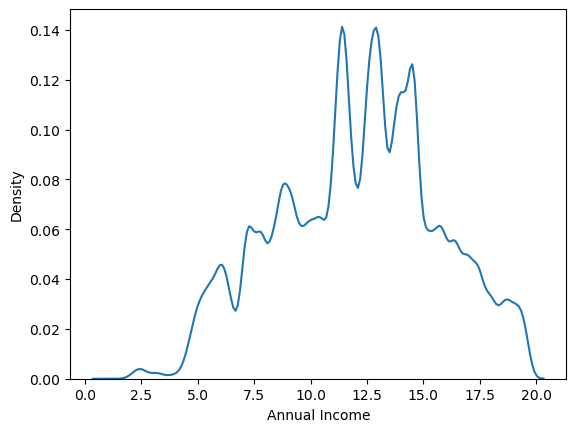

In [5]:
sns.kdeplot((train_data["Annual Income"])**(1/4))
plt.show()

In [15]:
from scipy.stats import yeojohnson, skew

train_data["Annual Income"].skew()
cubed = (train_data["Annual Income"]**(1/3)).skew()

In [16]:
cubed

0.07707145154810349

In [13]:
income_med = train_data["Annual Income"].median()
train_data["Annual Income"] = train_data["Annual Income"].fillna(income_med)
train_data["Annual Income"].isna().sum()

0

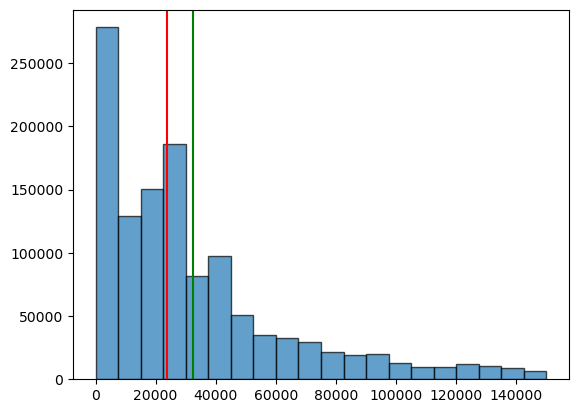

In [17]:
plt.hist(train_data["Annual Income"], edgecolor="black", bins=20, alpha=0.7)
plt.axvline(train_data["Annual Income"].median(), c='r')
plt.axvline(train_data["Annual Income"].mean(), c='g')
plt.show()

In [25]:
yeo_transformed_income = yeojohnson(train_data["Annual Income"], 0.279)

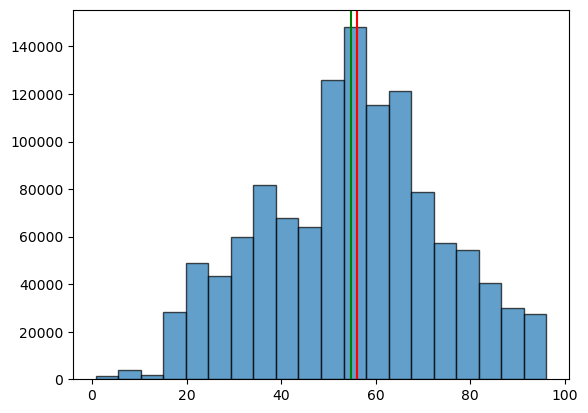

In [26]:
plt.hist(yeo_transformed_income, edgecolor="black", bins=20, alpha=0.7)
plt.axvline(np.median(yeo_transformed_income), c='r')
plt.axvline(np.mean(yeo_transformed_income), c='g')
plt.show()

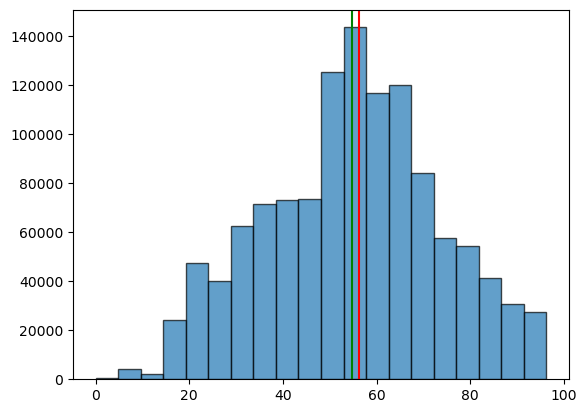

In [27]:
from scipy.stats import boxcox

bc_transformed, bc_lambda = boxcox(train_data["Annual Income"])

plt.hist(bc_transformed, edgecolor="black", bins=20, alpha=0.7)
plt.axvline(np.median(bc_transformed), c='r')
plt.axvline(np.mean(bc_transformed), c='g')
plt.show()

1.2409139421441986


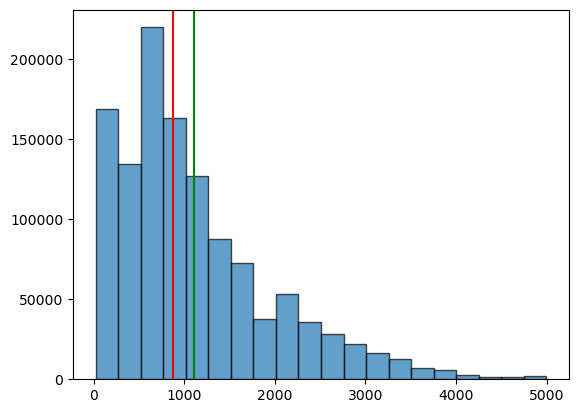

In [30]:
insur = train_data["Premium Amount"]

print(skew(insur))
plt.hist(insur, edgecolor="black", bins=20, alpha=0.7)
plt.axvline(np.median(insur), c='r')
plt.axvline(np.mean(insur), c='g')
plt.show()

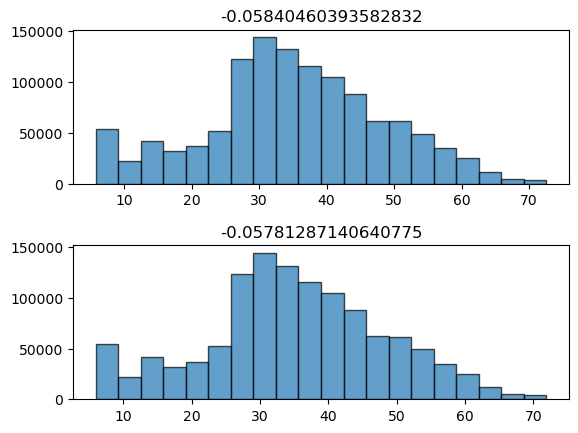

In [35]:
bc_insur, bc_insur_lambda = boxcox(insur)

yeo_insur, yeo_insur_lambda = yeojohnson(insur)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].hist(bc_insur, edgecolor="black", bins=20, alpha=0.7)
ax[0].set_title(f"{skew(bc_insur)}")

ax[1].hist(yeo_insur, edgecolor="black", bins=20, alpha=0.7)
ax[1].set_title(f"{skew(yeo_insur)}")

plt.subplots_adjust(hspace=0.4)
plt.show()